In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

# Pendulo doble

In [2]:
# Parámetros físicos
g = 9.81
L1 = L2 = 1.0
m1 = m2 = 1.0

# Condiciones iniciales
theta1 = np.pi / 2
theta2 = np.pi / 2
omega1 = 0.0
omega2 = 0.0

dt = 0.04
steps = 1000

In [3]:
# Ecuaciones de movimiento
def derivs(state):
    theta1, omega1, theta2, omega2 = state

    delta = theta2 - theta1

    den1 = (m1 + m2)*L1 - m2*L1*np.cos(delta)**2
    den2 = (L2/L1)*den1

    domega1 = (m2*L1*omega1**2*np.sin(delta)*np.cos(delta) +
               m2*g*np.sin(theta2)*np.cos(delta) +
               m2*L2*omega2**2*np.sin(delta) -
               (m1 + m2)*g*np.sin(theta1)) / den1

    domega2 = (-m2*L2*omega2**2*np.sin(delta)*np.cos(delta) +
               (m1 + m2)*(g*np.sin(theta1)*np.cos(delta) -
               L1*omega1**2*np.sin(delta) - g*np.sin(theta2))) / den2

    return np.array([omega1, domega1, omega2, domega2])

<IPython.core.display.Javascript object>


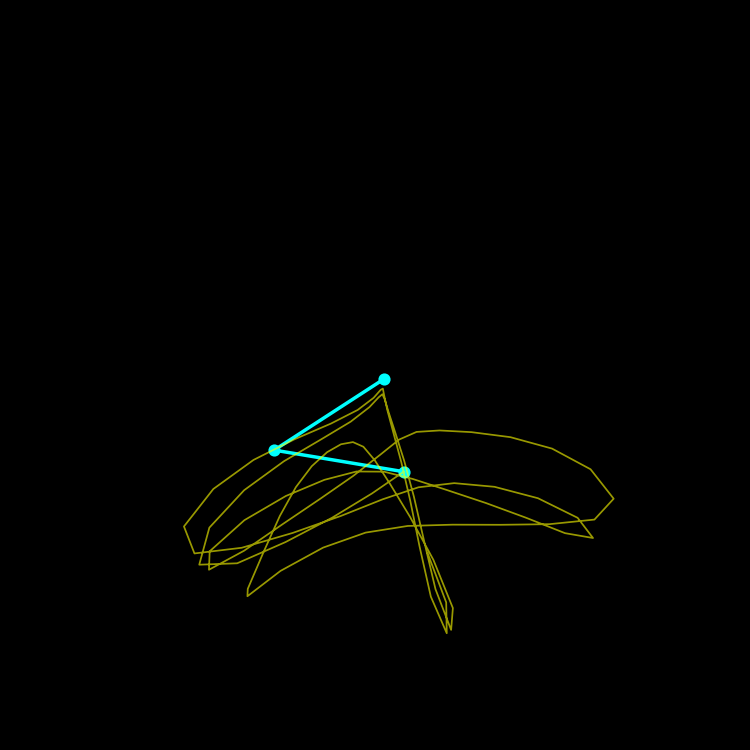

In [5]:
# Simulación
state = np.array([theta1, omega1, theta2, omega2])
states = []

for _ in range(steps):
    k1 = derivs(state)
    k2 = derivs(state + dt * k1 / 2)
    k3 = derivs(state + dt * k2 / 2)
    k4 = derivs(state + dt * k3)
    state += dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    states.append(state.copy())

states = np.array(states)
x1 = L1 * np.sin(states[:, 0])
y1 = -L1 * np.cos(states[:, 0])
x2 = x1 + L2 * np.sin(states[:, 2])
y2 = y1 - L2 * np.cos(states[:, 2])

# Gráfico y estilo
fig, ax = plt.subplots(figsize=(6,6))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
ax.set_aspect('equal')
ax.axis('off')  # sin ejes

# Líneas y estela
line, = ax.plot([], [], 'o-', lw=2, color='cyan')
trail, = ax.plot([], [], '-', lw=1, color='yellow', alpha=0.6)

trail_x, trail_y = [], []

def update(i):
    line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    trail_x.append(x2[i])
    trail_y.append(y2[i])
    trail.set_data(trail_x[-100:], trail_y[-100:])  # rastro de los últimos 100 frames
    return line, trail

ani = FuncAnimation(fig, update, frames=range(0, steps, 2), blit=True)
ani
